
Top 5 Doctors by Revenue:
   doctor_id        doctor_name                     specialty  total_revenue  \
38      D039      Gabriel Stone  Medical sales representative      160905.05   
41      D042      Brooke Levine                  Retail buyer      159369.34   
17      D018   Claudia Robinson      Advertising art director      134953.36   
39      D040          Lisa Gray                Health visitor      132596.89   
11      D012  Cynthia Rodriguez           Automotive engineer      131264.42   

    num_patients  avg_feedback  
38            30      2.935484  
41            27      2.832143  
17            23      2.904167  
39            20      2.580000  
11            22      3.395833  

Revenue by Specialty:
specialty
Advertising art director                                       241884.34
Education officer, museum                                      192608.33
Medical sales representative                                   160905.05
Retail buyer                              

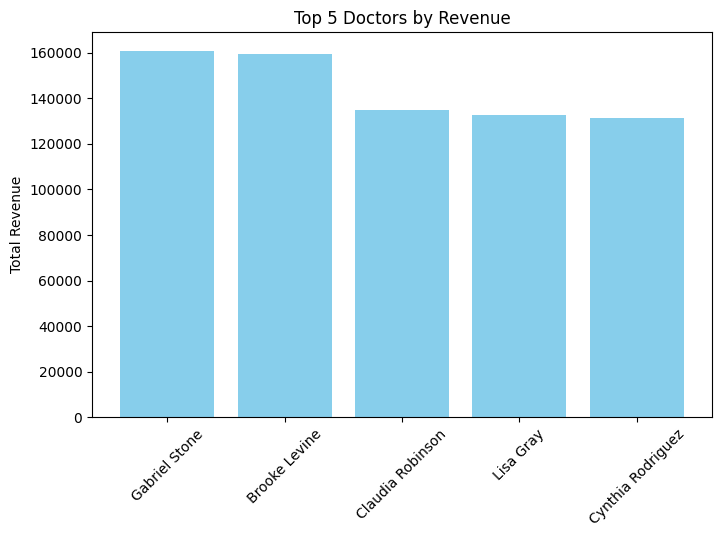

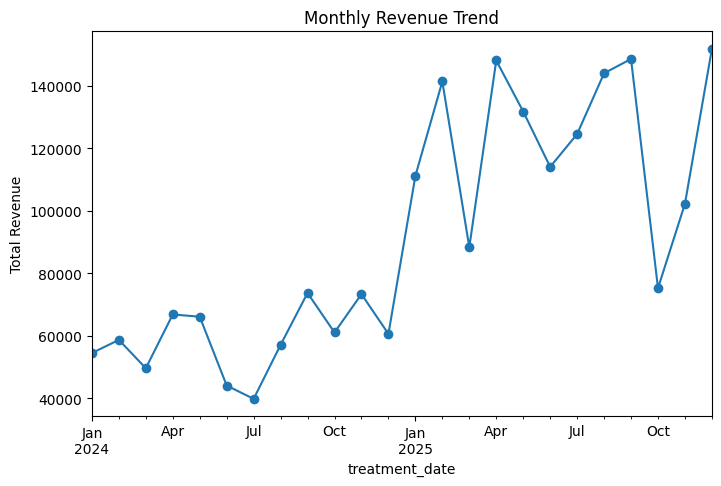

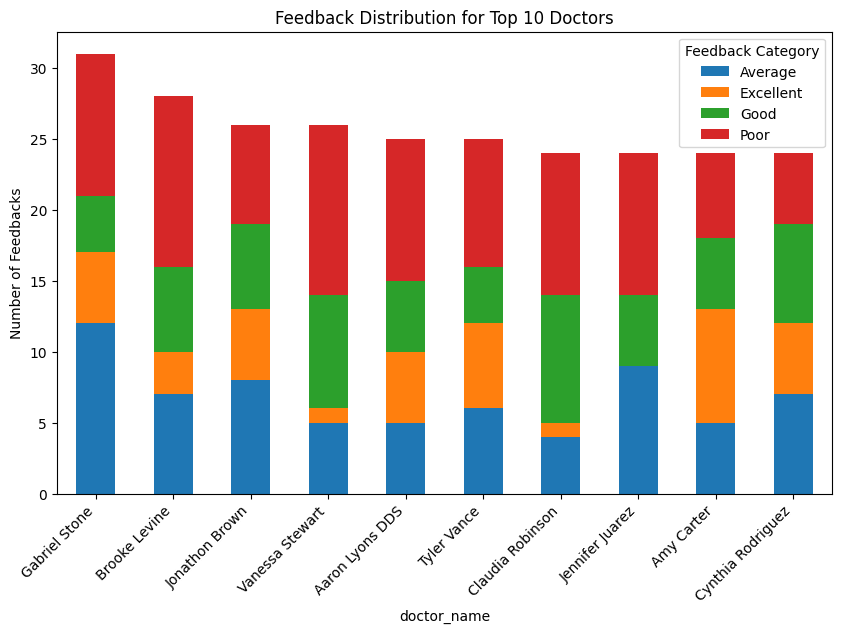

In [ ]:
# ------------------------------
# DATA ANALYST TASKS
# ------------------------------

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

final_df = pd.read_csv("F:/Sem-5/Fundamentals of Data Engineering/Labs/Lab-2/data_warehouse/processed_healthcare_data.csv")

final_df["treatment_date"] = pd.to_datetime(final_df["treatment_date"], errors="coerce")

# 1. Doctor Performance: Revenue, Patients, Avg Feedback
doctor_perf = final_df.groupby(["doctor_id", "doctor_name", "specialty"]).agg(
    total_revenue=("total_cost", "sum"),
    num_patients=("patient_id", "nunique"),
    avg_feedback=("patient_feedback_score", "mean")
).reset_index()

print("\nTop 5 Doctors by Revenue:")
print(doctor_perf.sort_values("total_revenue", ascending=False).head(5))


# 2. Specialty-wise Revenue
specialty_revenue = final_df.groupby("specialty")["total_cost"].sum().sort_values(ascending=False)
print("\nRevenue by Specialty:")
print(specialty_revenue)


# 3. Feedback Distribution per Doctor
def categorize_feedback(score):
    if pd.isna(score):
        return "No Feedback"
    elif score < 2.5:
        return "Poor"
    elif score < 3.5:
        return "Average"
    elif score < 4.5:
        return "Good"
    else:
        return "Excellent"

final_df["feedback_category"] = final_df["patient_feedback_score"].apply(categorize_feedback)

feedback_dist = final_df.groupby(["doctor_name", "feedback_category"]).size().unstack(fill_value=0)
print("\nFeedback Distribution per Doctor:")
print(feedback_dist.head())


# 4. Revenue Trend Over Time
monthly_revenue = final_df.groupby(final_df["treatment_date"].dt.to_period("M"))["total_cost"].sum()
print("\nMonthly Revenue Trend:")
print(monthly_revenue)


# ------------------------------
# VISUALIZATIONS
# ------------------------------

# Bar Chart: Top 5 Doctors by Revenue
top5_doctors = doctor_perf.sort_values("total_revenue", ascending=False).head(5)
plt.figure(figsize=(8,5))
plt.bar(top5_doctors["doctor_name"], top5_doctors["total_revenue"], color="skyblue")
plt.title("Top 5 Doctors by Revenue")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

# Line Chart: Revenue Trend
monthly_revenue.plot(kind="line", marker="o", figsize=(8,5), title="Monthly Revenue Trend")
plt.ylabel("Total Revenue")
plt.show()

# Stacked Bar Chart: Feedback Distribution for Top 10 Doctors
top_doctors = final_df["doctor_name"].value_counts().head(10).index
feedback_top = feedback_dist.loc[top_doctors]

feedback_top.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Feedback Distribution for Top 10 Doctors")
plt.ylabel("Number of Feedbacks")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Feedback Category")
plt.show()